<a href="https://colab.research.google.com/github/hugueds/kaggle-titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### THE DATA


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

##### Insights
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

#### Imports and load the data

In [3]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

TensorFlow 2.x selected.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/Work/Kaggle/titanic/train.csv', index_col='PassengerId')

#### General information

In [18]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [22]:
train.shape

(891, 11)

In [19]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


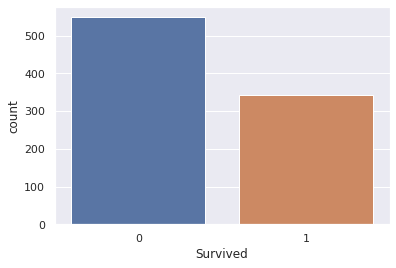

In [40]:
sns.countplot(x=train['Survived'])

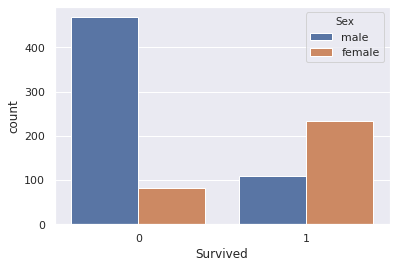

In [41]:
sns.countplot(x=train['Survived'], hue=df['Sex'])

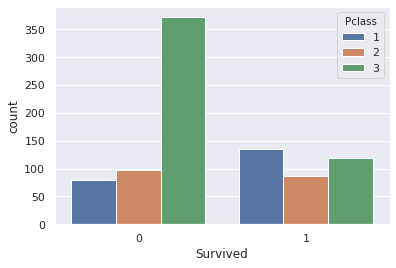

In [42]:
sns.countplot(x=train['Survived'], hue=df['Pclass'])

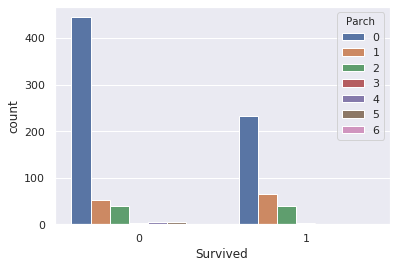

In [54]:
sns.countplot(x=df['Survived'], hue=df['Parch'])

### Processing the missing and standardize Data

In [0]:
# Checkpoint 
df = train.copy()

In [0]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype(int)

In [0]:
highest = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(highest)

False    687
True     204
Name: HadCabin, dtype: int64


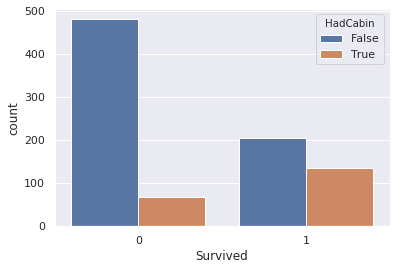

In [85]:
df['HadCabin'] = df['Cabin'].notna()
print(df['HadCabin'].value_counts())
sns.countplot(x=df['Survived'], hue=df['HadCabin'])

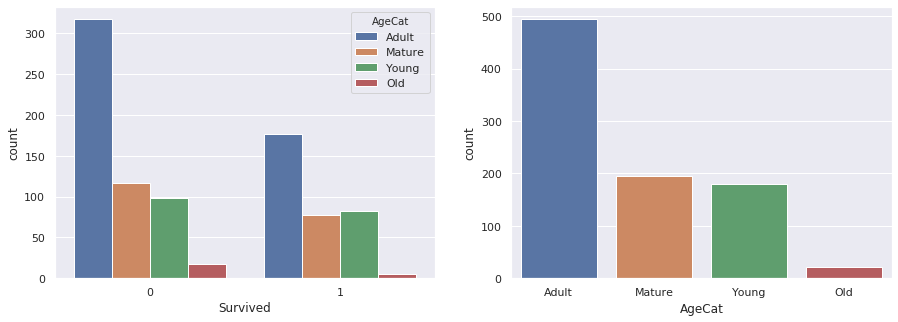

In [109]:
def classify_age(age):    
    if age <= 20:
        return 'Young'
    elif age > 20 and age <= 35:
        return 'Adult'
    elif age > 35 and age <= 60:
        return 'Mature'
    elif age > 60:
        return 'Old'

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

df['AgeCat'] = df['Age'].apply(classify_age)
sns.countplot(x=df['Survived'], hue=df['AgeCat'], ax=ax1)
sns.countplot(x=df['AgeCat'], ax=ax2)
sns.countplot(x=df['Survived'], hue=df['AgeCat'], ax=ax3)

In [105]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HadCabin,AgeCat
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,Mature
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,Adult
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,False,Adult
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,True,Young
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S,False,Adult


### Cleaning and Analysing

 #### Insights (v.1) (not accurate)
 - Name doesn't seemed to be useful right now, however it could be useful if we know the background of the passangers
 - Cabin has a lot of missing values and doesn't seem to be useful right now, Titanic blueprints must be checked otherwise
 - Everybody has Embarked, so the missing row is meaninglass
 - Missing Ages could be replaced by ... 
 - Inspect the data inside the Ticket Column later
 - If the data doesn't have children or parents verify

#### Insights (v.2)

- Check if passager has an important Name
- Classify if the passager had a Cabin or not
- Fill with the most Common Embarked where the data is missing
- Do tranform the ages into integers

In [0]:
columns = train_df.columns
columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df = train_df.copy()
df_t = test_df.copy()

In [0]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1)
df = df.drop('Fare', axis=1)

df_t= df_t.drop('Name', axis=1)
df_t = df_t.drop('Ticket', axis=1)
df_t = df_t.drop('Cabin', axis=1)
df_t = df_t.drop('Fare', axis=1)

In [0]:
df = df.dropna(subset=['Embarked'])
df_t = df_t.dropna(subset=['Embarked'])

In [0]:
df['AgeCat'] = df['Age'].apply(classify_age)
df_t['AgeCat'] = df_t['Age'].apply(classify_age)

In [0]:
df = df.drop('Age', axis=1)
df_t = df_t.drop('Age', axis=1)

In [0]:
df['SexCat'] = df['Sex'].map({'male': 0, 'female': 1})
df_t['SexCat'] = df_t['Sex'].map({'male': 0, 'female': 1})

In [0]:
df = df.drop('Sex', axis=1)
df_t = df_t.drop('Sex', axis=1)

In [0]:
df['EmbarkedCat'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df = df.drop('Embarked', axis=1)

df_t['EmbarkedCat'] = df_t['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_t = df_t.drop('Embarked', axis=1)

In [0]:
df

,Survived,Pclass,SibSp,Parch,AgeCat,SexCat,EmbarkedCat
PassengerId,,,,,,,
1,0,3,1,0,1,0,2
2,1,1,1,0,2,1,0
3,1,3,0,0,1,1,2
4,1,1,1,0,1,1,2
5,0,3,0,0,1,0,2
...,...,...,...,...,...,...,...
887,0,2,0,0,1,0,2
888,1,1,0,0,4,1,2
889,0,3,1,2,4,1,2


#### Get the categoricals

In [0]:
dummies = pd.get_dummies(df, columns=['Pclass', 'Parch','EmbarkedCat', 'SibSp', 'AgeCat'], drop_first=True)
df = dummies

dummies = pd.get_dummies(df_t, columns=['Pclass', 'Parch','EmbarkedCat', 'SibSp', 'AgeCat'], drop_first=True)
df_t = dummies

#### Split the dataset

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_t = df_t.iloc[:, 1:].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, train_size=0.8)

In [0]:
len(X_train)

711

In [0]:
len(X_test)

178

#### Train the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
X_train.shape

(711, 19)

In [0]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(19, activation='relu'))

# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
es = EarlyStopping(patience=3)

Train on 711 samples, validate on 178 samples
Epoch 1/10
711/711 [==============================] - 2s 2ms/sample - loss: 0.6148 - val_loss: 0.4953
Epoch 2/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4837 - val_loss: 0.4574
Epoch 3/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4578 - val_loss: 0.4429
Epoch 4/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4506 - val_loss: 0.4220
Epoch 5/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4393 - val_loss: 0.4101
Epoch 6/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4386 - val_loss: 0.4061
Epoch 7/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4271 - val_loss: 0.4119
Epoch 8/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4298 - val_loss: 0.4140
Epoch 9/10
711/711 [==============================] - 1s 2ms/sample - loss: 0.4189 - val_loss: 0.3997
Epoch 10/10
711/711 [===============

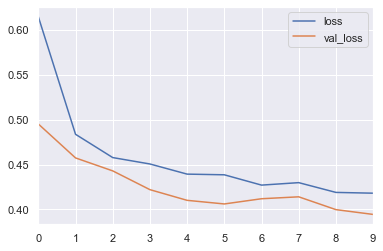

In [0]:
epochs = 10
batch_size = 2
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks=[es])
loss = pd.DataFrame(model.history.history)
loss.plot()

In [0]:
pred = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
rep = classification_report(y_test, pred)

In [0]:
print(rep)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [0]:
pred_new = model.predict_classes(X_t)


,SexCat,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,EmbarkedCat_1,EmbarkedCat_2,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,AgeCat_2,AgeCat_4
PassengerId,,,,,,,,,,,,,,,,,,,,
892,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
893,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
894,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
895,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
896,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1306,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1307,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [0]:
new_df = pd.DataFrame(pred_new, columns=['Survived'])

In [0]:
new_df.index = df_t.index

In [0]:
new_df

,Survived
PassengerId,
892,0
893,0
894,1
895,0
896,0
...,...
1305,0
1306,0
1307,0


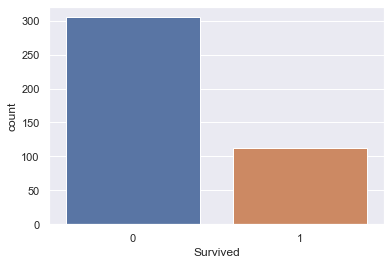

In [0]:
sns.countplot(x='Survived', data=new_df)

In [0]:
df_t['SexCat'].value_counts()

0    266
1    152
Name: SexCat, dtype: int64

In [0]:
new_df.to_csv('titanic_predictions.csv')